# Bonus Project individual

## SQP Method

### Normal SQP

for each problem choose 5 starting points

In [56]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [48]:
def gradient(f, eps):
    def g(x_vec):
        n = len(x_vec)
        grad = np.zeros(n)
        x = np.copy(x_vec)
        e = np.eye(n)

        # based on equation 8.7 from the book
        for i in range(n):
            grad[i] = (f(x + e[i]*eps) - f(x-e[i]*eps)) / (2 * eps)
        return grad
    return g

def gradient_2(f, eps):
    def g(x_vec):
        n = len(x_vec)
        hessian = np.zeros((n, n))
        x = np.copy(x_vec)
        e = np.eye(n)

        # based on equation 8.21 from the book
        for i in range(n):
            for j in range(n):
                hessian[i][j] = (f(x + e[i]*eps + e[j]*eps) - f(x+e[i]*eps) - f(x+e[j]*eps) + (f(x))) / eps**2
        return hessian
    return g

def Lagrange(f:callable, c:list) -> callable:
    def L(x,l):
        constraint = sum([l[i]*c[i](x) for i in range(len(c))])
        return f(x) - constraint
    return L

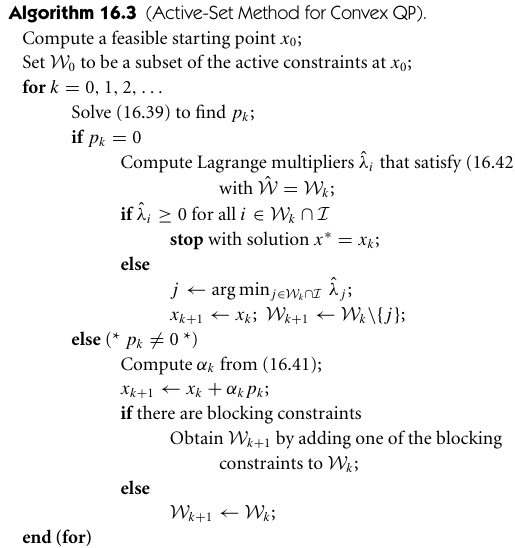
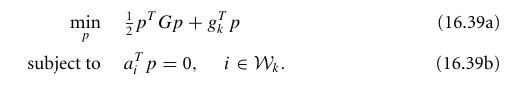

In [ ]:
def QP(x_0: np.array, c: list):
    
    # we try to find a active constraint
    feasible_points = []
    for i in range(len(c)):
        if c[i](x_0) == 0:
            feasible_points.append(i)

    # the case that the initial point is not on a constraint has to be considered    
    # if len(feasible_points) != 2:

    G = np.array([[6,2,1],[2,5,2],[1,2,4]])
    c = np.array([-8,-3,-3])
    A = np.array([[1,0,1], [0,1,1]])
    b = np.array([3,0])
    

    


    
    k = 0

    while True:
        pk = solve()

        if pk == 0:
            li = solve()
            if li.all() >= 0:
                return x
            else:
                j = np.argmin(li)
                x = x
                W = W\j
        else: 
            alpha = solve()
            x = x+alpha*pk
            



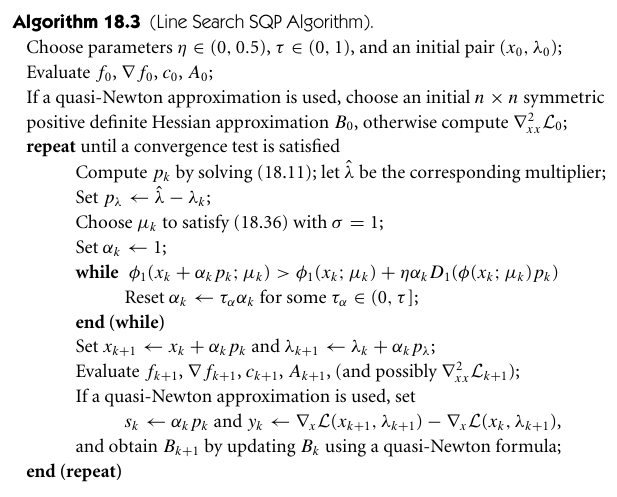

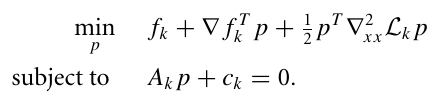

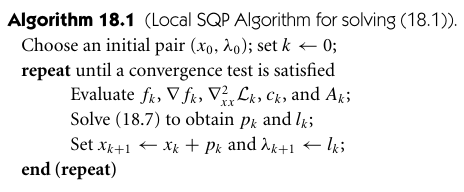

In [52]:
# further information here: https://en.wikipedia.org/wiki/Sequential_quadratic_programming
def SQP_Method(f: callable, x_0: np.array, c: list):
    # we choose some initial values
    x = np.copy(x_0)
    l = np.array([1.]*x_0.shape[0])

    df = gradient(f,1e-5)

    # we set the interations to 0    
    k = 0
    converged = False

    while True:
        # we need to evaluate f, grad f, grad 2 L, ck, and Ak 
        fk = f(x)
        dfk = df(x)
        ck = [constraint(x) for constraint in c]
        d2Lk = gradient_2(Lagrange(fk, ck), 1e-5)
        Ak = [gradient(constraint, 1e-5) for constraint in c]

        pk, lk = QP(d2Lk, dfk, fk, Ak, ck)

        x = x + pk
        l = l + lk

        if dfk.all() <= 1e-1:
            break
        
        k += 1
    
    return x, k 

SQP_Method(f,np.array([1.0, 0.0, 3.0, 0.0, 0.0]), [eqc_1,eqc_2,eqc_3])

KeyboardInterrupt: 

### 1)
$$\min e^{x_1 x_2 x_3 x_4 x_5} − {1\over 2} (x_1^3 + x_2^3 + 1)^2$$
$$\text{subject to } x_1^2 + x_2^ 2 + x_3 ^2 + x_4 ^2 + x_5 ^2 − 10 = 0$$
$$x_2 x_3 − 5x_4 x_5 = 0$$
$$x_1^3 + x_2^3 + 1 = 0$$
starting points $x_0 = (−1.71, 1.59, 1.82, −0.763, −0.763)^T$  
The solution is $x^*=(−1.8, 1.7, 1.9, −0.8, −0.8)^T$

Additional starting points: $x_0 = (0,0,0,0,0)^T$, $x_0 = (1,0,3,0,0)^T$, $x_0 = (3,0,1,1,0)^T$,  $x_0 = (0,1,2,3,4)^T$  

In [16]:
def f(x):
    return np.exp(x[0]*x[1]*x[2]*x[3]*x[4]) - 0.5 * (x[0]**3 + x[1]**3 + 1)**2

# equality constraints
def eqc_1(x):
    return x[0]**2 + x[1]**2 + x[2]**2 + x[3]**2 + x[4]**2 -10

def eqc_2(x):
    return x[1] * x[2] - 5 * x[3] * x[4]

def eqc_3(x):
    return x[0]**3 + x[1]**3 + 1

starting_points = [np.array([-1.71, 1.59, 1.82, -0.763, -0.763]),
                   np.array([0.0, 0.0, 0.0, 0.0, 0.0]),
                   np.array([1.0, 0.0, 3.0, 0.0, 0.0]),
                   np.array([3.0, 0.0, 1.0, 1.0, 0.0]),
                   np.array([0.0, 1.0, 2.0, 3.0, 4.0])]

In [6]:
# scipy libary
for x0 in starting_points:
    bounds = [(None, None), (None, None), (None, None), (None, None), (None, None)]
    constraint_definition = [{'type': 'eq', 'fun': eqc_1},
                             {'type': 'eq', 'fun': eqc_2},
                             {'type': 'eq', 'fun': eqc_3}]

    result = minimize(f, x0, method='SLSQP', bounds=bounds, constraints=constraint_definition)

    print(result)
    print()

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.053949847760167556
       x: [-1.717e+00  1.596e+00  1.827e+00 -7.636e-01 -7.636e-01]
     nit: 3
     jac: [ 9.173e-02 -9.871e-02 -8.620e-02  2.063e-01  2.063e-01]
    nfev: 18
    njev: 3

 message: Singular matrix C in LSQ subproblem
 success: False
  status: 6
     fun: 0.5
       x: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00]
     nit: 1
     jac: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00]
    nfev: 6
    njev: 1

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 1.0
       x: [-1.000e+00 -2.968e-32  3.000e+00  0.000e+00  0.000e+00]
     nit: 8
     jac: [ 3.813e-04  0.000e+00  0.000e+00  0.000e+00  0.000e+00]
    nfev: 49
    njev: 8

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 1.0
       x: [-1.000e+00  8.820e-14  2.121e+00  2.121e+00  1.764e-14]
     nit: 9
     jac: [ 1.040e-04  0.000e+00  0.0

/tmp/ipykernel_7437/3008426413.py:2: RuntimeWarning: overflow encountered in exp
  return np.exp(x[0]*x[1]*x[2]*x[3]*x[4]) - 0.5 * (x[0]**3 + x[1]**3 + 1)**2


### 2)

Rosenbrock function with the following constraints:  
$x_1^2+ x_2^2 \le 1$  
$x_2 \ge 0$

with the starting points  
$x_0 = (0.8,0.6)^T$, $x_0 = (1,0)^T$, $x_0 = (1,1)^T$, $x_0 = (0,0)^T$, $x_0 = (-1,1)^T$  

In [7]:
def f(x):
    return 100*((x[1]-x[0]**2)**2)+(1-x[0])**2

def ineqc_1(x):
    return 1 - x[0]**2 - x[1]**2

def ineqc_2(x):
    return x[1]

starting_points = [np.array([0.8, 0.6]),
                   np.array([1.0, 0.0]),
                   np.array([1.0, 1.0]),
                   np.array([0.0, 0.0]),
                   np.array([-1.0, 1.0])]

In [8]:
# scipy libary
for x0 in starting_points:
    bounds = [(None, None), (None, None)]
    constraint_definition = [{'type': 'ineq', 'fun': ineqc_1},
                             {'type': 'ineq', 'fun': ineqc_2}]

    result = minimize(f, x0, method='SLSQP', bounds=bounds, constraints=constraint_definition)

    print(result)
    print()

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.04567480714789773
       x: [ 7.864e-01  6.177e-01]
     nit: 4
     jac: [-1.913e-01 -1.499e-01]
    nfev: 15
    njev: 4

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.04567476498697327
       x: [ 7.864e-01  6.177e-01]
     nit: 12
     jac: [-1.851e-01 -1.539e-01]
    nfev: 40
    njev: 12

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.04567480869289516
       x: [ 7.864e-01  6.177e-01]
     nit: 9
     jac: [-1.911e-01 -1.501e-01]
    nfev: 32
    njev: 9

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.04567480859570312
       x: [ 7.864e-01  6.177e-01]
     nit: 14
     jac: [-1.911e-01 -1.501e-01]
    nfev: 48
    njev: 14

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.04567479151714956
       x: [ 7.864e-01  6.177e-01]
     nit: 28
     

### 3)
The function
$$f (x) = 150(x_1x_2)^2 + (0.5x_1 + 2x_2 − 2)^2 ,$$

constraints
$$0 ≤ c_1 (x) = (x_1 − 1/2)2 + (x_2 − 1)2 − 5/16$$
$$0 ≤ c_2 (x) = (x_1 + 1)2 + (x_2 − 3/8)2 − 73/64$$
$$0 ≤ c_3 (x) = −(x_1 + 1)2 − (x_2 − 1)2 + \sqrt 2$$

In [9]:
def f(x):
    return 150*(x[0]*x[1])**2+(0.5*x[0]+2*x[1]-2)**2

def ineqc_1(x):
    return (x[0]-1/2)/2 + (x[1]-1)*2-5/16

def ineqc_2(x):
    return (x[0]-1)*2 + (x[1]-3/8)*2 - 73/64

def ineqc_3(x):
    return - (x[0]+1)*2 - (x[1]-1)*2 + np.sqrt(2)

starting_points = [np.array([0.1, 0.74]),
                   np.array([0.0, 0.0]),
                   np.array([0.5, 0.5]),
                   np.array([0.0, 0.76]),
                   np.array([-0.2, 0.8])]

In [10]:
# scipy libary
for x0 in starting_points:
    bounds = [(None, None), (None, None)]
    constraint_definition = [{'type': 'ineq', 'fun': ineqc_1},
                             {'type': 'ineq', 'fun': ineqc_2},
                             {'type': 'ineq', 'fun': ineqc_3}]

    result = minimize(f, x0, method='SLSQP', bounds=bounds, constraints=constraint_definition)

    print(result)
    print()

 message: Positive directional derivative for linesearch
 success: False
  status: 8
     fun: 0.12105391364368653
       x: [-1.851e-02  8.606e-01]
     nit: 13
     jac: [-4.400e+00 -1.064e+00]
    nfev: 75
    njev: 9

 message: Positive directional derivative for linesearch
 success: False
  status: 8
     fun: 0.4791659298636611
       x: [-4.736e-02  1.126e+00]
     nit: 11
     jac: [-1.779e+01  1.674e+00]
    nfev: 53
    njev: 7

 message: Positive directional derivative for linesearch
 success: False
  status: 8
     fun: 0.5439067417910531
       x: [-5.661e-02  1.057e+00]
     nit: 11
     jac: [-1.888e+01  1.356e+00]
    nfev: 64
    njev: 7

 message: Positive directional derivative for linesearch
 success: False
  status: 8
     fun: 0.21806345535713004
       x: [-7.679e-03  7.713e-01]
     nit: 24
     jac: [-1.832e+00 -1.832e+00]
    nfev: 197
    njev: 20

 message: Positive directional derivative for linesearch
 success: False
  status: 8
     fun: 1.472882087644360

### 4) 

constraints: $$\|x\|^2_2 \le 1$$

In [11]:
def ineqc_3(x):
    return 1 - np.linalg.norm(x) ** 2

## Warm Start or Full Quasi-Newton approximation